🚀 Initializing GitHub Collaboration Network Analyzer...
✓ Configured display settings and plot styles

📝 Setting up GitHub API access...
Enter GitHub token (press Enter for public access): 
✓ Using public API access (rate limited to 60 requests/hour)
ℹ️ Available rate limit: 60/60 requests remaining

📋 Configuring repository search parameters...
Enter GitHub topic (e.g., machine-learning): 
✓ Topic set to: 'machine-learning'
Number of repositories (10-50): 50
✓ Will collect 50 repositories
Filter repos updated in last N days (0 for all): 0
✓ No date filtering applied

🔍 Searching GitHub for 'machine-learning' repositories...
✓ Search query: topic:machine-learning+stars:>10
📊 Fetching page 1... (0/50 repos collected)
✓ Found 100 repositories on page 1
✓ Total unique repositories: 100
⚠️ API rate limit approaching: 8 requests remaining
✅ Successfully collected 50 repositories
⏱️ Repository collection completed in 3.3 seconds

📊 Repository Statistics:


Repository,Stars,Forks,Language,Updated,Description,Star Rating
Footballotter/Trading-GPT,15,2,Not specified,2025-05-03,TradeGPT is an intelligent trading bot built with ...,★
nautechsystems/nautilus_trader,5813,823,Python,2025-05-03,A high-performance algorithmic trading platform an...,★★★
apache/airflow,39917,14966,Python,2025-05-03,Apache Airflow - A platform to programmatically au...,★★★★
microsoft/onnxruntime,16460,3185,C++,2025-05-03,"ONNX Runtime: cross-platform, high performance ML ...",★★★★
neoml-lib/neoml,774,126,C++,2025-05-03,Machine learning framework for both deep learning ...,★★
emoss08/Trenova,30,9,Go,2025-05-03,An AI-driven asset based Transportation Management...,★
dynamicslab/pysindy,1576,331,Python,2025-05-03,A package for the sparse identification of nonline...,★★★
Vikranth3140/Movie-Revenue-Prediction,12,5,TeX,2025-05-03,Movie Revenue Prediction System predicts the reven...,★
justinjjlee/NHL-Analytics,17,2,Python,2025-05-03,Data science analyses delving into National Hockey...,★
kalininalab/DataSAIL,23,1,Python,2025-05-03,DataSAIL is a tool to split datasets while reducin...,★


📈 Repository Stats Summary:
- Most popular: tensorflow/tensorflow (189760 stars)
- Average stars: 12838.4
- Languages: Python, Not specified, C++, Jupyter Notebook, TypeScript

👥 Collecting contributor data...
[1/50] Processing Footballotter/Trading-GPT...
  Fetching contributors page 1...
  ✓ Found 1 contributors on page 1
  ✅ Found 1 contributors for Footballotter/Trading-GPT
[2/50] Processing nautechsystems/nautilus_trader...
  Fetching contributors page 1...
  ✓ Found 74 contributors on page 1
  ✅ Found 74 contributors for nautechsystems/nautilus_trader
[3/50] Processing apache/airflow...
  Fetching contributors page 1...
  ✓ Found 100 contributors on page 1
  Fetching contributors page 2...
  ✓ Found 100 contributors on page 2
  Fetching contributors page 3...
  ✓ Found 100 contributors on page 3
  Fetching contributors page 4...
  ✓ Found 100 contributors on page 4
  Fetching contributors page 5...
  ✓ Found 13 contributors on page 5
  ✅ Found 413 contributors for apache/airflow


<ipython-input-1-fd4e1f73d568>:375: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(communities))
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


🔦 Highlighting critical elements...
🏷️ Labeling key nodes...
📜 Creating legend...
📊 Adding colorbar...

📈 Generating supplementary plots...


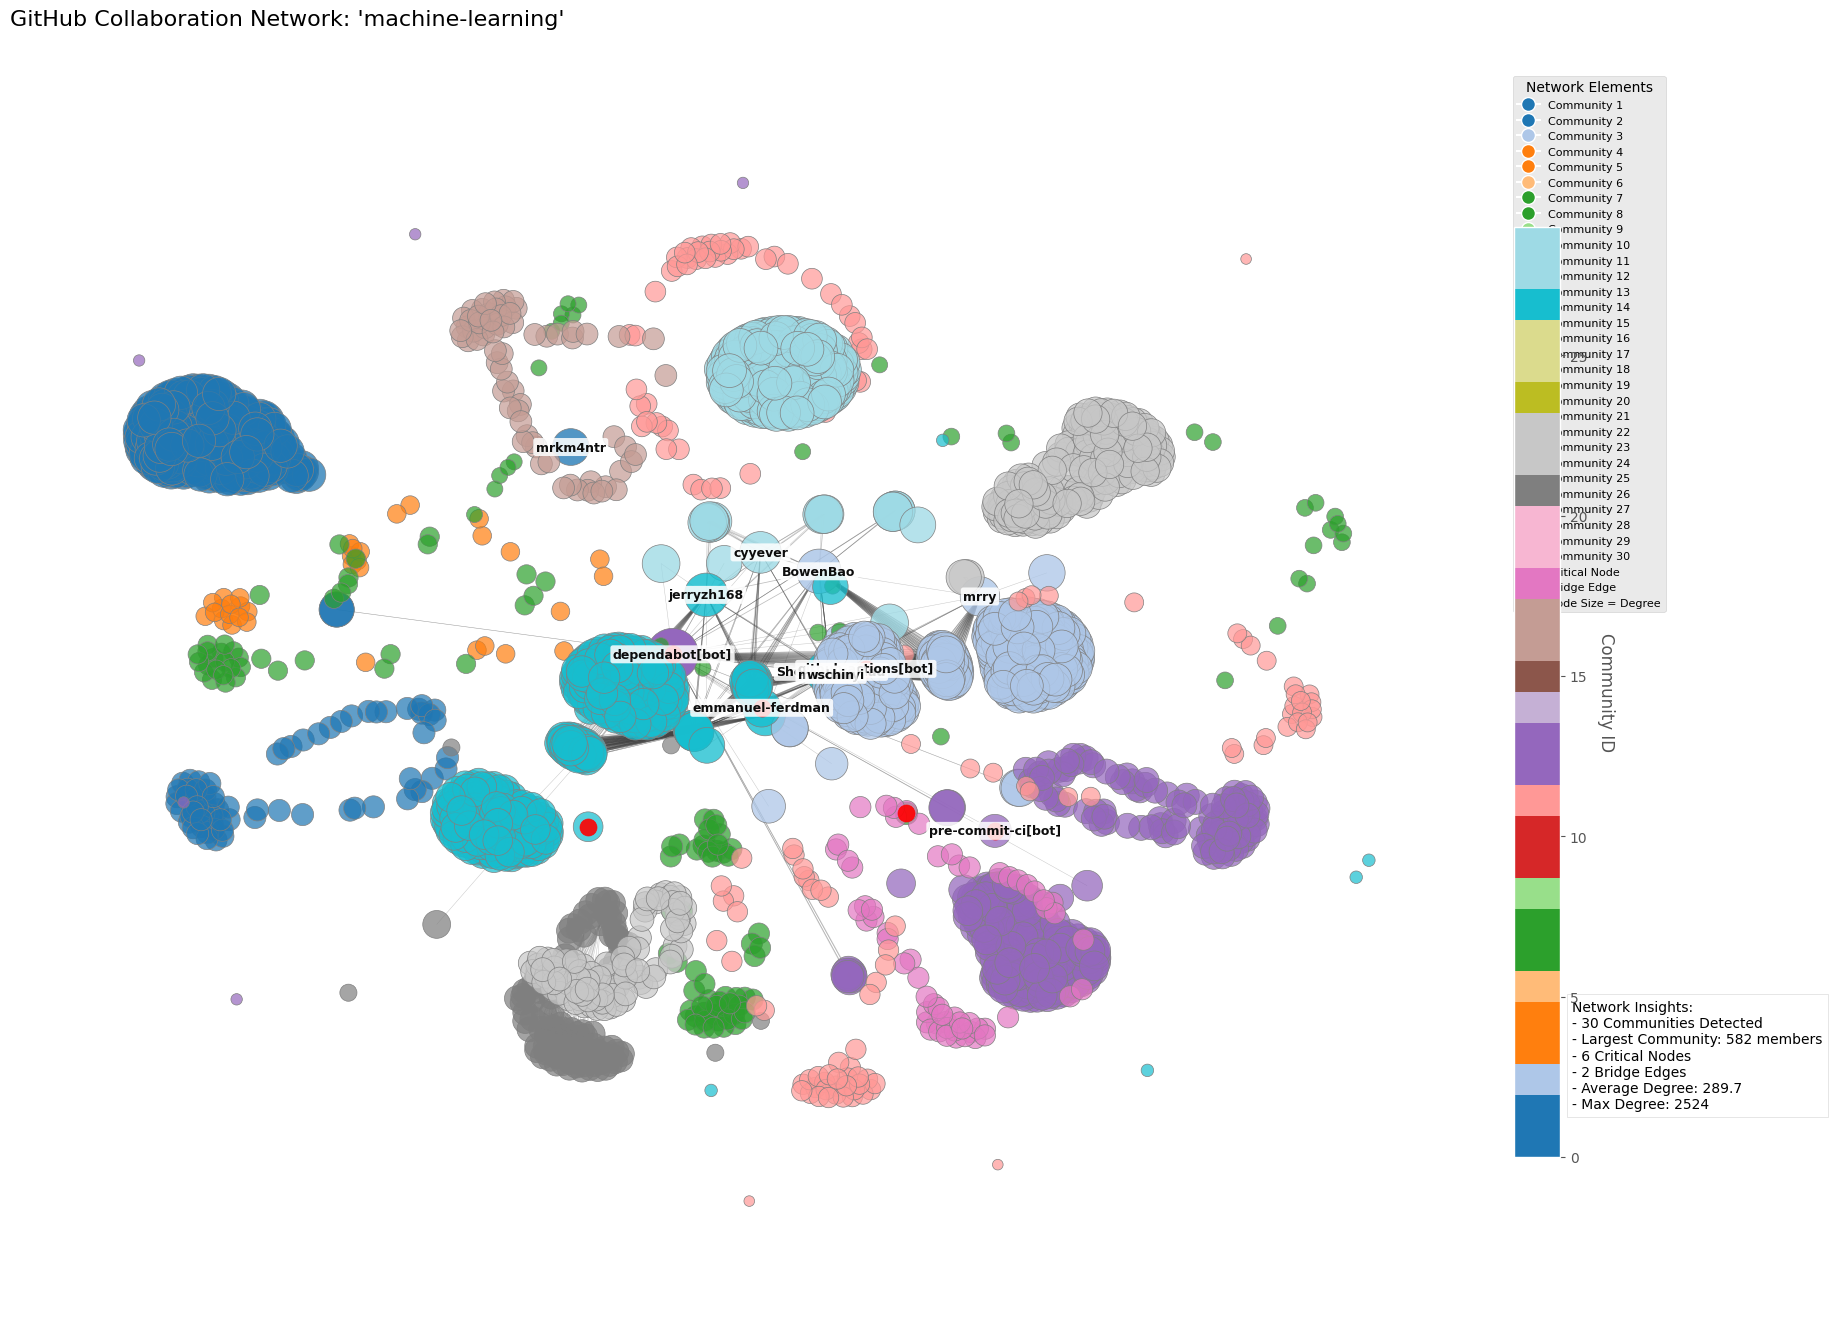

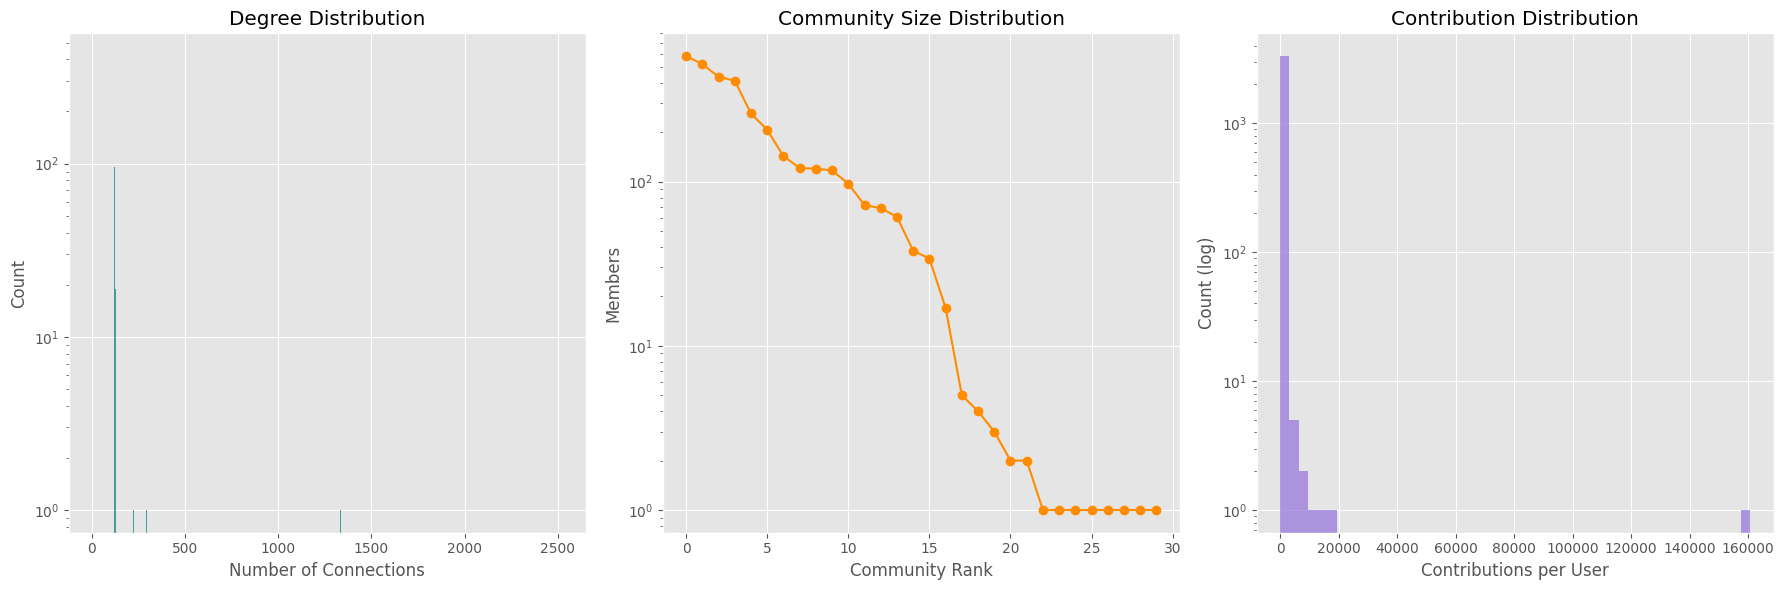


🎉 Analysis completed in 180.9 seconds
🔗 Network saved as 'github_collaboration_network.gexf'

🔑 Key Network Insights:
- Most connected user: dependabot[bot] (2524 connections)
- Most central user: dependabot[bot] (betweenness: 0.500)
- Largest community: 582 members
- Most active contributor: Footballotter (160733 contributions)


In [1]:
# GitHub Collaboration Network Analyzer - Complete Version
# @title GitHub Network Analysis
# Author : Vipul Raj Jha
import networkx as nx
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from collections import defaultdict
import time
import json
from IPython.display import display, Markdown, HTML
from datetime import datetime, timedelta
from google.colab import drive

# Configuration with verbose output
print("🚀 Initializing GitHub Collaboration Network Analyzer...")
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)
print("✓ Configured display settings and plot styles")

# @title GitHub API Setup with enhanced error handling
print("\n📝 Setting up GitHub API access...")
github_token = input("Enter GitHub token (press Enter for public access): ").strip()
headers = {'Accept': 'application/vnd.github.v3+json'}
if github_token:
    headers['Authorization'] = f'token {github_token}'
    print("✓ Authentication configured with provided token")

    # Test token validity
    test_response = requests.get("https://api.github.com/rate_limit", headers=headers)
    if test_response.status_code == 200:
        rate_info = test_response.json()['rate']
        print(f"✓ Token validated. Rate limit: {rate_info['remaining']}/{rate_info['limit']} requests remaining")
    else:
        print(f"⚠️ Token may not be valid. Status: {test_response.status_code}")
else:
    print("✓ Using public API access (rate limited to 60 requests/hour)")
    test_response = requests.get("https://api.github.com/rate_limit")
    if test_response.status_code == 200:
        rate_info = test_response.json()['rate']
        print(f"ℹ️ Available rate limit: {rate_info['remaining']}/{rate_info['limit']} requests remaining")

# @title Repository Selection with validation
print("\n📋 Configuring repository search parameters...")
topic = input("Enter GitHub topic (e.g., machine-learning): ").strip() or "machine-learning"
print(f"✓ Topic set to: '{topic}'")

try:
    num_repos = int(input("Number of repositories (10-50): ") or "15")
    num_repos = max(10, min(num_repos, 50))
    print(f"✓ Will collect {num_repos} repositories")
except ValueError:
    num_repos = 15
    print(f"⚠️ Invalid input. Using default: {num_repos} repositories")

try:
    days_back = int(input("Filter repos updated in last N days (0 for all): ") or "0")
    if days_back > 0:
        date_filter = (datetime.now() - timedelta(days=days_back)).strftime("%Y-%m-%d")
        print(f"✓ Filtering by repos updated since {date_filter}")
    else:
        print("✓ No date filtering applied")
except ValueError:
    days_back = 0
    print("⚠️ Invalid input. Using no date filtering")

# @title Data Collection with detailed progress reporting
print(f"\n🔍 Searching GitHub for '{topic}' repositories...")
query = f"topic:{topic}+stars:>10"
if days_back > 0:
    date_filter = (datetime.now() - timedelta(days=days_back)).strftime("%Y-%m-%d")
    query += f"+pushed:>={date_filter}"

print(f"✓ Search query: {query}")
repos = []
page = 1
start_time = time.time()

try:
    while len(repos) < num_repos:
        print(f"📊 Fetching page {page}... ({len(repos)}/{num_repos} repos collected)")
        url = f"https://api.github.com/search/repositories?q={query}&sort=updated&order=desc&page={page}&per_page=100"

        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            new_repos = data['items']

            if not new_repos:
                print("ℹ️ No more repositories found")
                break

            print(f"✓ Found {len(new_repos)} repositories on page {page}")
            repos += [repo for repo in new_repos if repo['full_name'] not in [r['full_name'] for r in repos]]
            print(f"✓ Total unique repositories: {len(repos)}")

            # Check rate limits
            if 'X-RateLimit-Remaining' in response.headers:
                remaining = int(response.headers['X-RateLimit-Remaining'])
                if remaining < 10:
                    print(f"⚠️ API rate limit approaching: {remaining} requests remaining")

            page += 1
            time.sleep(1.5)
        elif response.status_code == 403:
            reset_time = int(response.headers.get('X-RateLimit-Reset', 0))
            wait_time = max(0, reset_time - time.time())
            print(f"⚠️ Rate limit exceeded. Reset in {wait_time:.0f} seconds.")
            if wait_time > 180:
                print("⚠️ Rate limit wait too long, proceeding with collected data")
                break
            elif wait_time > 0 and wait_time < 180:
                print(f"⏳ Waiting {wait_time:.0f} seconds for rate limit reset...")
                time.sleep(wait_time + 1)
        else:
            print(f"❌ Error: {response.status_code} - {response.json().get('message', 'Unknown error')}")
            break
except Exception as e:
    print(f"❌ Exception during repository collection: {str(e)}")

repos = repos[:num_repos]
if len(repos) < num_repos:
    print(f"⚠️ Could only collect {len(repos)} repositories (requested {num_repos})")
else:
    print(f"✅ Successfully collected {len(repos)} repositories")

elapsed = time.time() - start_time
print(f"⏱️ Repository collection completed in {elapsed:.1f} seconds")

# Display repositories
print("\n📊 Repository Statistics:")
repo_df = pd.DataFrame([{
    'Repository': repo['full_name'],
    'Stars': repo['stargazers_count'],
    'Forks': repo['forks_count'],
    'Language': repo['language'] or 'Not specified',
    'Updated': repo['pushed_at'][:10],
    'Description': (repo['description'] or '')[:50] + ('...' if repo['description'] and len(repo['description']) > 50 else '')
} for repo in repos])

# Corrected line with proper parenthesis
repo_df['Star Rating'] = repo_df['Stars'].apply(lambda x: '★' * min(5, max(1, int(np.log10(x)))))

display(HTML("<h3>Selected Repositories</h3>"))
display(HTML(repo_df.to_html(index=False, escape=False)))

# Statistics summary
print(f"📈 Repository Stats Summary:")
print(f"- Most popular: {repo_df.iloc[repo_df['Stars'].idxmax()]['Repository']} ({repo_df['Stars'].max()} stars)")
print(f"- Average stars: {repo_df['Stars'].mean():.1f}")
print(f"- Languages: {', '.join(repo_df['Language'].value_counts().index[:5])}")

# @title Contributor Collection
contributors = defaultdict(lambda: {'repos': set(), 'contributions': 0})
repo_contributors = {}

print("\n👥 Collecting contributor data...")
contributor_start = time.time()
total_repos = len(repos)

for idx, repo in enumerate(repos):
    repo_name = repo['full_name']
    print(f"[{idx+1}/{total_repos}] Processing {repo_name}...")

    contributors_url = f"https://api.github.com/repos/{repo_name}/contributors?per_page=100"
    page_count = 0
    contributor_count = 0

    try:
        while contributors_url:
            page_count += 1
            print(f"  Fetching contributors page {page_count}...")

            response = requests.get(contributors_url, headers=headers)
            if response.status_code != 200:
                print(f"  ❌ Error {response.status_code}: {response.json().get('message', 'Unknown error')}")
                break

            data = response.json()
            if not data:
                print("  ℹ️ No contributors found on this page")
                break

            new_contributors = len(data)
            contributor_count += new_contributors
            print(f"  ✓ Found {new_contributors} contributors on page {page_count}")

            for contrib in data:
                login = contrib['login']
                contributions = contrib['contributions']
                contributors[login]['repos'].add(repo_name)
                contributors[login]['contributions'] += contributions

            if repo_name not in repo_contributors:
                repo_contributors[repo_name] = []
            repo_contributors[repo_name].extend([c['login'] for c in data])

            contributors_url = response.links.get('next', {}).get('url')

            if contributors_url:
                if 'X-RateLimit-Remaining' in response.headers:
                    remaining = int(response.headers.get('X-RateLimit-Remaining', 1))
                    if remaining < 5:
                        reset_time = int(response.headers.get('X-RateLimit-Reset', 0))
                        wait_time = max(0, reset_time - time.time())
                        print(f"  ⚠️ Rate limit low ({remaining} left). Reset in {wait_time:.0f} seconds.")
                        if wait_time < 60:
                            print(f"  ⏳ Waiting {wait_time:.0f} seconds...")
                            time.sleep(wait_time + 1)

                time.sleep(0.8)
    except Exception as e:
        print(f"  ❌ Exception processing {repo_name}: {str(e)}")

    print(f"  ✅ Found {contributor_count} contributors for {repo_name}")

contributor_elapsed = time.time() - contributor_start
print(f"\n🧑‍💻 Found {len(contributors)} unique contributors across all repositories")
print(f"⏱️ Contributor collection completed in {contributor_elapsed:.1f} seconds")

# Contributor stats
contributions_list = [data['contributions'] for data in contributors.values()]
avg_contributions = np.mean(contributions_list)
max_contributions = np.max(contributions_list)
print(f"📊 Contributor Stats:")
print(f"- Average contributions per user: {avg_contributions:.1f}")
print(f"- Maximum contributions by a user: {max_contributions}")
print(f"- Users with 10+ contributions: {len([c for c in contributions_list if c >= 10])}")

# @title Network Construction
print("\n🧩 Building collaboration network...")
network_start = time.time()

G = nx.Graph()
print("📋 Adding contributor nodes...")

for i, (user, data) in enumerate(contributors.items()):
    if i % 100 == 0 and i > 0:
        print(f"  ✓ Added {i}/{len(contributors)} nodes...")

    G.add_node(user,
              repos=', '.join(sorted(data['repos'])),
              num_repos=len(data['repos']),
              contributions=int(data['contributions']),
              degree_cent=0.0,
              betweenness=0.0,
              community=-1)

print(f"✓ Added {len(G.nodes)} nodes to the network")

# Add edges
print("\n📋 Adding collaboration edges...")
edge_counts = defaultdict(int)
edge_count = 0
repo_count = len(repo_contributors)

for idx, (repo, contribs) in enumerate(repo_contributors.items()):
    if idx % 5 == 0:
        print(f"  Processing repository {idx+1}/{repo_count}...")

    for i in range(len(contribs)):
        for j in range(i+1, len(contribs)):
            u1, u2 = contribs[i], contribs[j]
            edge_key = tuple(sorted((u1, u2)))
            edge_counts[edge_key] += 1
            edge_count += 1

print(f"  ✓ Found {edge_count} potential collaborations")
print(f"  ✓ Found {len(edge_counts)} unique collaboration pairs")

for idx, ((u1, u2), weight) in enumerate(edge_counts.items()):
    if idx % 1000 == 0 and idx > 0:
        print(f"  Added {idx}/{len(edge_counts)} edges...")

    G.add_edge(u1, u2, weight=int(weight))

network_elapsed = time.time() - network_start
print(f"\n🔗 Network construction complete in {network_elapsed:.1f} seconds")
print(f"📊 Network stats: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Connectivity analysis
components = list(nx.connected_components(G))
print(f"📋 Network contains {len(components)} connected components")
print(f"  - Largest component has {len(max(components, key=len))} nodes ({len(max(components, key=len))/G.number_of_nodes()*100:.1f}% of network)")

# @title Network Analysis
print("\n📊 Performing network analysis...")
analysis_start = time.time()

# Degree centrality
print("📈 Calculating degree centrality...")
degree_start = time.time()
degree_cent = nx.degree_centrality(G)
degree_elapsed = time.time() - degree_start
print(f"  ✓ Completed in {degree_elapsed:.2f} seconds")
nx.set_node_attributes(G, degree_cent, 'degree_cent')

# Betweenness centrality
print("📈 Calculating betweenness centrality...")
betweenness_start = time.time()
k_sample = min(500, len(G.nodes))
print(f"  Using {k_sample} node samples for betweenness approximation")
betweenness = nx.betweenness_centrality(G, k=k_sample, seed=42)
betweenness_elapsed = time.time() - betweenness_start
print(f"  ✓ Completed in {betweenness_elapsed:.2f} seconds")
nx.set_node_attributes(G, betweenness, 'betweenness')

# PageRank
print("📈 Calculating PageRank...")
pagerank_start = time.time()
pagerank = nx.pagerank(G, alpha=0.85)
nx.set_node_attributes(G, pagerank, 'pagerank')
pagerank_elapsed = time.time() - pagerank_start
print(f"  ✓ Completed in {pagerank_elapsed:.2f} seconds")

# Community detection
print("🧩 Detecting communities with Louvain algorithm...")
comm_start = time.time()
communities = nx.community.louvain_communities(G, resolution=0.9, seed=42)
comm_elapsed = time.time() - comm_start
print(f"  ✓ Completed in {comm_elapsed:.2f} seconds")
print(f"  ✓ Detected {len(communities)} communities")

# Map communities
community_map = {}
community_sizes = []
for i, comm in enumerate(communities):
    comm_size = len(comm)
    community_sizes.append(comm_size)
    print(f"  ✓ Community {i+1}: {comm_size} members")
    for user in comm:
        community_map[user] = int(i)

nx.set_node_attributes(G, community_map, 'community')

# Critical nodes
print("🔍 Finding critical nodes and bridges...")
cut_nodes = list(nx.articulation_points(G))
bridges = list(nx.bridges(G))
print(f"  ✓ Found {len(cut_nodes)} articulation points")
print(f"  ✓ Found {len(bridges)} bridges")

analysis_elapsed = time.time() - analysis_start
print(f"\n✅ Network analysis completed in {analysis_elapsed:.1f} seconds")

# @title Enhanced Visualization
print("\n🎨 Generating visualizations...")
viz_start = time.time()

plt.figure(figsize=(20, 16))
ax = plt.gca()

# Use largest connected component
components = list(nx.connected_components(G))
main_component = G.subgraph(max(components, key=len)).copy()
print(f"📊 Visualizing main component with {main_component.number_of_nodes()} nodes and {main_component.number_of_edges()} edges")

# Calculate layout
print("📐 Computing network layout...")
layout_start = time.time()
pos = nx.spring_layout(main_component, k=0.3, seed=42, iterations=50)
layout_elapsed = time.time() - layout_start
print(f"  ✓ Layout computed in {layout_elapsed:.2f} seconds")

# Node styling
degrees = dict(nx.degree(main_component))
community_colors = [main_component.nodes[n]['community'] for n in main_component.nodes]
max_degree = max(degrees.values()) if degrees else 1
node_size = [np.sqrt(d * 750) + 20 for d in dict(main_component.degree()).values()]
node_alpha = [0.7 + 0.3*(d/max_degree) for d in degrees.values()]

# Draw nodes
print("🎨 Drawing nodes...")
cmap = plt.cm.get_cmap('tab20', len(communities))
nodes = nx.draw_networkx_nodes(
    main_component,
    pos,
    node_size=node_size,
    node_color=community_colors,
    cmap=cmap,
    alpha=node_alpha,
    edgecolors='gray',
    linewidths=0.5
)

# Draw edges
print("🎨 Drawing edges...")
edges = main_component.edges(data=True)
edge_widths = [np.log(data['weight'])*0.5 for _, _, data in edges]
edge_alphas = [min(0.2 + data['weight']*0.05, 0.6) for _, _, data in edges]

nx.draw_networkx_edges(
    main_component,
    pos,
    edgelist=edges,
    width=edge_widths,
    alpha=edge_alphas,
    edge_color='#444444'
)

# Highlight critical nodes
print("🔦 Highlighting critical elements...")
cut_nodes_main = [n for n in cut_nodes if n in main_component.nodes]
if cut_nodes_main:
    nx.draw_networkx_nodes(
        main_component,
        pos,
        nodelist=cut_nodes_main,
        node_size=150,
        node_color='red',
        alpha=0.9,
        label='Critical Nodes'
    )

# Highlight bridge edges
bridge_edges = [e for e in bridges if e[0] in main_component and e[1] in main_component]
if bridge_edges:
    nx.draw_networkx_edges(
        main_component,
        pos,
        edgelist=bridge_edges,
        width=2.5,
        alpha=0.9,
        edge_color='darkred',
        style='dashed',
        label='Bridge Edges'
    )

# Label important nodes
print("🏷️ Labeling key nodes...")
top_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:7]
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
important_nodes = set([n[0] for n in top_degree + top_betweenness + top_pagerank])
labels = {n: n for n in important_nodes}

nx.draw_networkx_labels(
    main_component,
    pos,
    labels=labels,
    font_size=9,
    font_color='black',
    font_weight='bold',
    alpha=0.95,
    bbox=dict(
        facecolor='white',
        edgecolor='none',
        alpha=0.85,
        boxstyle='round,pad=0.2'
    )
)

# Create legend
print("📜 Creating legend...")
legend_elements = [
    plt.Line2D([0], [0],
               marker='o',
               color='w',
               label=f'Community {i+1}',
               markerfacecolor=cmap(i),
               markersize=10)
    for i in range(len(communities))
]

legend_elements += [
    plt.Line2D([0], [0],
               marker='o',
               color='w',
               label='Critical Node',
               markerfacecolor='red',
               markersize=10),
    plt.Line2D([0], [0],
               color='darkred',
               linewidth=2,
               label='Bridge Edge',
               linestyle='dashed'),
    plt.Line2D([0], [0],
               marker='o',
               color='w',
               label='Node Size = Degree',
               markerfacecolor='grey',
               markersize=np.sqrt(100)/1.5)
]

plt.legend(
    handles=legend_elements,
    loc='upper left',
    title="Network Elements",
    fontsize=8,
    title_fontsize=10,
    bbox_to_anchor=(1.01, 1),
    borderaxespad=0.
)

# Add colorbar
print("📊 Adding colorbar...")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(communities)-1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.01)
cbar.set_label('Community ID', rotation=270, labelpad=20, fontsize=12)

# Add statistics
stats_text = f"""Network Insights:
- {len(communities)} Communities Detected
- Largest Community: {max(community_sizes)} members
- {len(cut_nodes)} Critical Nodes
- {len(bridges)} Bridge Edges
- Average Degree: {np.mean(list(degrees.values())):.1f}
- Max Degree: {max(degrees.values())}"""

plt.text(
    1.05, 0.25, stats_text,
    transform=ax.transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'),
    verticalalignment='top'
)

plt.title(
    f"GitHub Collaboration Network: '{topic}'\n",
    fontsize=16,
    pad=20,
    loc='left'
)
plt.axis('off')

# Supplementary plots
print("\n📈 Generating supplementary plots...")
plt.figure(figsize=(18, 6))

# Degree distribution
plt.subplot(1, 3, 1)
degree_hist = np.unique(list(degrees.values()), return_counts=True)
plt.bar(degree_hist[0], degree_hist[1], color='teal', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Number of Connections')
plt.ylabel('Count')
plt.yscale('log')

# Community sizes
plt.subplot(1, 3, 2)
community_sizes_sorted = sorted(community_sizes, reverse=True)
plt.plot(community_sizes_sorted, marker='o', linestyle='-', color='darkorange')
plt.title('Community Size Distribution')
plt.xlabel('Community Rank')
plt.ylabel('Members')
plt.yscale('log')

# Contribution distribution
plt.subplot(1, 3, 3)
contributions = [c['contributions'] for c in contributors.values()]
plt.hist(contributions, bins=50, color='mediumpurple', alpha=0.7, log=True)
plt.title('Contribution Distribution')
plt.xlabel('Contributions per User')
plt.ylabel('Count (log)')

plt.tight_layout()
plt.show()

# Final output
total_elapsed = time.time() - start_time
print(f"\n🎉 Analysis completed in {total_elapsed:.1f} seconds")
print("🔗 Network saved as 'github_collaboration_network.gexf'")

# Key findings
print("\n🔑 Key Network Insights:")
print(f"- Most connected user: {top_degree[0][0]} ({top_degree[0][1]} connections)")
print(f"- Most central user: {max(betweenness.items(), key=lambda x: x[1])[0]} (betweenness: {max(betweenness.values()):.3f})")
print(f"- Largest community: {max(community_sizes)} members")
print(f"- Most active contributor: {max(contributors.items(), key=lambda x: x[1]['contributions'])[0]} ({max(contributions)} contributions)")

# Save network
nx.write_gexf(G, "github_collaboration_network.gexf")